In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn .linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
warnings.filterwarnings('ignore')


In [3]:
train_data = pd.read_csv('../input/titanic/train.csv')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testData_data = pd.read_csv('../input/titanic/test.csv')
testData_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Cleaning

In [6]:
train_data[["Embarked","Name"]].groupby(by=["Embarked"],as_index=True).count().sort_values("Name",ascending=False)

,Name
Embarked,
S,644
C,168
Q,77


In [7]:
most_repeated = "S"
train_data.Embarked.replace(np.nan, most_repeated, inplace=True)
testData_data.Embarked.replace(np.nan, most_repeated, inplace=True)
print("the number of null value in Embarked Column =",train_data.Embarked.isnull().sum())

the number of null value in Embarked Column = 0


In [8]:
Embarked_transform_dict = {"S":1, "C":2, "Q":3}
for value in Embarked_transform_dict:
    train_data.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
    testData_data.Embarked.replace(value, Embarked_transform_dict.get(value), inplace=True)
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [9]:
print("the number of null value in Cabin Column =", train_data.Cabin.isnull().sum())
train_data.drop("Cabin", axis=1, inplace=True)
testData_data.drop("Cabin", axis=1, inplace=True)

train_data.head()

the number of null value in Cabin Column = 687


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [10]:
print("Range of Fare column values = ", train_data.Fare.max() - train_data.Fare.min())
testData_data.Fare.replace(np.nan, testData_data.Fare.mean(), inplace=True)
print("Range of Fare column values = ", testData_data.Fare.max() - testData_data.Fare.min())

Range of Fare column values =  512.3292
Range of Fare column values =  512.3292


In [11]:
train_data.Fare = train_data.Fare.astype("int64")
testData_data.Fare = testData_data.Fare.astype("int64")

# df_train.info()
testData_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,1


In [12]:
Sex_dict = {"male":1, "female":2}
for key, value in Sex_dict.items():
    train_data.Sex.replace(key, value, inplace=True)
    testData_data.Sex.replace(key, value, inplace=True)
train_data.Sex = train_data.Sex.astype("int64")
testData_data.Sex = testData_data.Sex.astype("int64")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8,1


In [13]:
age_surv_corr= train_data['Age'].corr(train_data['Survived'])
age_surv_corr

-0.07722109457217768

In [14]:
class_surv_corr= train_data['Pclass'].corr(train_data['Survived'])
class_surv_corr

-0.33848103596101475

In [15]:
train_data['Sex'].value_counts()

1    577
2    314
Name: Sex, dtype: int64

In [16]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,1,0.188908
1,2,0.742038


# EDA

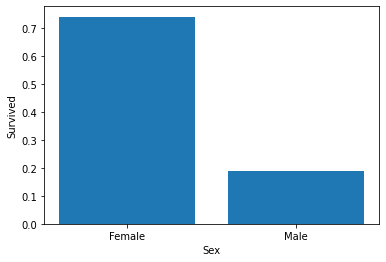

In [17]:
x_axis = ['Female','Male']
y_axis = [0.74,0.19]

plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

In [18]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

549 people died and 342 people survived

In [19]:
survived = 'survived'
not_survived = 'not survived'
#Percentage of people that survived
survived_per = train_data[train_data['Survived']==1]
survived=float(round((len(survived)/len(train_data))*100.0))
print("Survived:",str(survived),'%')

Survived: 1.0 %


In [20]:
#Percentage of people that died
died= train_data[train_data['Survived']==0]
died =float(round((len(died)/len(train_data))*100.0))
print("Died:",str(died),'%')

Died: 62.0 %


In [21]:
train_data['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

there where 3 classes of tickets and 491 wich is class 3 had the highest passengers

In [22]:
train_data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

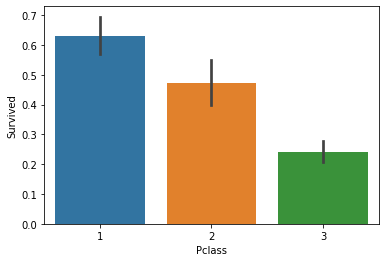

In [23]:
sns.barplot(x='Pclass', y='Survived', data=train_data)


In [24]:
all_classes=pd.crosstab(train_data['Pclass'],train_data['Sex'])
print(all_classes)

Sex       1    2
Pclass          
1       122   94
2       108   76
3       347  144


In [25]:
all_classes =pd.crosstab(train_data['Pclass'],train_data['Survived'])
print(all_classes)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


Text(0.5, 1.0, 'The perentage of those who survived and died in the different coach classes')

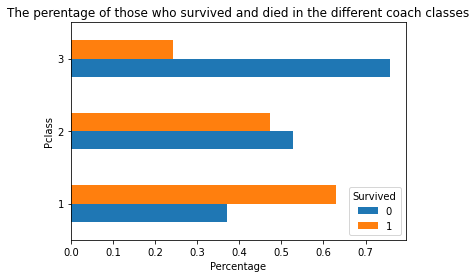

In [26]:
all_classes.div(all_classes.sum(1).astype(float),axis=0).plot(kind='barh',stacked=False)
plt.ylabel('Pclass')
plt.xlabel('Percentage')
plt.title('The perentage of those who survived and died in the different coach classes')

In [27]:
freq_table = train_data['Age'].value_counts(bins=8).sort_index()
freq_table

(0.339, 10.368]      64
(10.368, 20.315]    115
(20.315, 30.263]    230
(30.263, 40.21]     155
(40.21, 50.158]      86
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age, dtype: int64

In [28]:
freq = pd.DataFrame(freq_table)
freq

,Age
"(0.339, 10.368]",64
"(10.368, 20.315]",115
"(20.315, 30.263]",230
"(30.263, 40.21]",155
"(40.21, 50.158]",86
"(50.158, 60.105]",42
"(60.105, 70.052]",17
"(70.052, 80.0]",5


the ages between 20 to 30 had the most passengers

In [29]:
train_data.Embarked.value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [30]:
train_data[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,1,0.339009
1,2,0.553571
2,3,0.389610


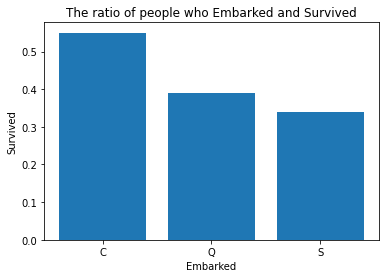

In [31]:
x_axis = ['C','Q','S']
y_axis = [0.55,0.39,0.34]

plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.title('The ratio of people who Embarked and Survived')
plt.show()

In [32]:
train_data.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [33]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


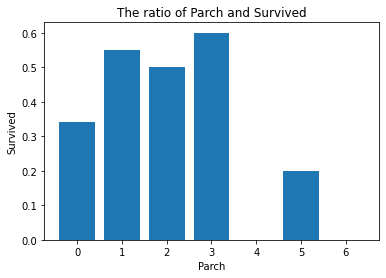

In [34]:
x_axis = [0,1,2,3,4,5,6]
y_axis = [0.34,0.55,0.50,0.60,0.0,0.2,0.0]

plt.bar(x=x_axis, height=y_axis)
plt.xlabel('Parch')
plt.ylabel('Survived')
plt.title('The ratio of Parch and Survived')
plt.show()

In [35]:
train_data[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


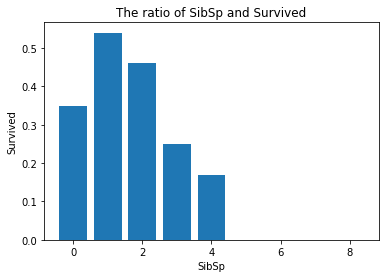

In [36]:
x_axis = [0,1,2,3,4,5,8]
y_axis = [0.35,0.54,0.46,0.25,0.17,0.0,0.0]
plt.bar(x=x_axis, height=y_axis)
plt.xlabel('SibSp')
plt.ylabel('Survived')
plt.title('The ratio of SibSp and Survived')
plt.show()

In [37]:
df_Age_train = train_data.loc[pd.notna(train_data.Age)]
df_Age_train.Age = df_Age_train.Age.astype("float64")
df_Age_train.Age = (df_Age_train.Age - df_Age_train.Age.mean()) / df_Age_train.Age.std()
df_Age_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.530005,1,0,A/5 21171,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0.571430,1,0,PC 17599,71,2
2,3,1,3,"Heikkinen, Miss. Laina",2,-0.254646,0,0,STON/O2. 3101282,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0.364911,1,0,113803,53,1
4,5,0,3,"Allen, Mr. William Henry",1,0.364911,0,0,373450,8,1
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",2,0.640270,0,5,382652,29,3
886,887,0,2,"Montvila, Rev. Juozas",1,-0.185807,0,0,211536,13,1
887,888,1,1,"Graham, Miss. Margaret Edith",2,-0.736524,0,0,112053,30,1
889,890,1,1,"Behr, Mr. Karl Howell",1,-0.254646,0,0,111369,30,2


In [38]:
train_data.drop("Age", axis=1, inplace=True)
testData_data.drop("Age", axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,71,2
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,STON/O2. 3101282,7,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,53,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8,1


In [39]:
bins_i = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
labels_i = [1,2,3,4,5,6,7,8,9,10,11]

train_data['stage'] = 0
train_data['stage'] = pd.cut(train_data.Fare, bins=bins_i, labels=labels_i)

testData_data['stage'] = 0
testData_data['stage'] = pd.cut(testData_data.Fare, bins=bins_i, labels=labels_i)

train_data.stage.unique()

[1, 2, 6, 3, 5, 11, 4]
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 11]

In [40]:
train_data.Fare = train_data.stage.astype("int64")
testData_data.Fare = testData_data.stage.astype("int64")
train_data.drop("stage", axis=1, inplace=True)
testData_data.drop("stage", axis=1, inplace=True)

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,2,2
2,3,1,3,"Heikkinen, Miss. Laina",2,0,0,STON/O2. 3101282,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,2,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,1,1


In [42]:
data = [train_data, testData_data]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

In [43]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print (train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [44]:
columns = ["Pclass","Sex", "Fare", "Embarked","IsAlone"]
X_train = train_data[columns]
Y_train = train_data["Survived"]
len(Y_train)


891

In [45]:
X_test = testData_data[columns]
len(X_test)

418

In [46]:
Y_test =testData_data[columns]
len(Y_test)

418

# Predictions

# Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=40, min_samples_leaf=2, max_features=0.1, n_jobs=-1)
random_forest.fit(X_train, Y_train)
Y_pred_Random = random_forest.predict(X_test)
print("the train score of random_forest = ",round(random_forest.score(X_train, Y_train) *100, 2),"%")

the train score of random_forest =  82.27 %


# Logistic Regression

In [48]:
logistic_regression = LogisticRegression(solver='liblinear',max_iter=1000)
logistic_regression.fit(X_train, Y_train)
Y_pred_Logistic = logistic_regression.predict(X_test)
print("the train score of logistic_regression = ",round(logistic_regression.score(X_train, Y_train) *100, 2),"%")

the train score of logistic_regression =  78.56 %


In [49]:
tree = DecisionTreeClassifier(random_state=25)
tree.fit(X_train, Y_train)
Y_pred_Tree= tree.predict(X_test)
print("the score of prediction = ",round(tree.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  82.49 %


In [50]:
scores= cross_val_score(tree, X_train, Y_train, scoring="accuracy", cv=100)
scores.mean()

0.8136111111111112

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
Y_pred_KNN= knn.predict(X_test)
print("the score of prediction = ",round(knn.score(X_train, Y_train) * 100,2), "%")

the score of prediction =  80.81 %


In [52]:
submission = pd.DataFrame({
        "PassengerId": testData_data["PassengerId"],
        "Survived": Y_pred_KNN
    })
submission.to_csv('./submission.csv', index=False)